# Analsis de Crimen, costo de vivienda y seguridad comercial en los Angeles

In [1]:
# Análisis Socioeconómico de Los Ángeles: Crimen, Negocios y Bienes Raíces
# Fase 1: Adquisición y Limpieza de datos

# 1. Environment Setup
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import requests
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("Librerías cargadas correctamente.")

# 2. Adquisición de datos

crime_path = r'C:\Users\j_ale\OneDrive - ITESO\Semestre_4\Laboratorio de analisis\data\Crime_Data_from_2020_to_Present_20250424.csv'
business_path = r'C:\Users\j_ale\OneDrive - ITESO\Semestre_4\Laboratorio de analisis\data\Listing_of_All_Businesses_20250424.csv'
zillow_path = r'C:\Users\j_ale\OneDrive - ITESO\Semestre_4\Laboratorio de analisis\data\Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
neighborhood_area_path = r'C:\Users\j_ale\OneDrive - ITESO\Semestre_4\Laboratorio de analisis\data\Neighborhood_Demographics.geojson'
neighborhood_coords_path = r'C:\Users\j_ale\OneDrive - ITESO\Semestre_4\Laboratorio de analisis\data\LA_Times_Neighborhood_Boundaries.geojson'
population_path = r'C:\Users\j_ale\OneDrive - ITESO\Semestre_4\Laboratorio de analisis\data\Census_Data_by_Neighborhood_Council_20250502.csv'

crime = pd.read_csv(crime_path)
business = pd.read_csv(business_path)
zillow = pd.read_csv(zillow_path)
neighborhood_area = gpd.read_file(neighborhood_area_path)
neighborhood_coords = gpd.read_file(neighborhood_coords_path)
population = pd.read_csv(population_path)

Librerías cargadas correctamente.


## Limpieza y preparacion de datos del dataset de Crimen

In [13]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month,geometry
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3,POINT (-118.3506 34.0375)
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020,2,POINT (-118.2628 34.0444)
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,2020,11,POINT (-118.3002 34.021)
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3,POINT (-118.4387 34.1576)
4,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,0,M,101.0,STREET,IC,Invest Cont,510.0,200 E AVENUE 28,34.0820,-118.2130,2020,9,POINT (-118.213 34.082)


In [2]:
crime.isnull().sum()/len(crime)*100

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           15.097409
Vict Age           0.000000
Vict Sex          14.403218
Vict Descent      14.404411
Premis Cd          0.001592
Premis Desc        0.058496
Weapon Used Cd    67.441074
Weapon Desc       67.441074
Status             0.000099
Status Desc        0.000000
Crm Cd 1           0.001094
Crm Cd 2          93.119870
Crm Cd 3          99.769797
Crm Cd 4          99.993633
LOCATION           0.000000
Cross Street      84.655377
LAT                0.000000
LON                0.000000
dtype: float64

In [ ]:
crime.drop(columns = ['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4','Cross Street','Weapon Used Cd','Weapon Desc','Mocodes','Vict Descent'], inplace=True)
crime = crime.fillna({'Vict Sex':crime['Vict Sex'].mode()[0]})

In [9]:
crime.isnull().sum()/len(crime)*100


DR_NO          0.000000
Date Rptd      0.000000
DATE OCC       0.000000
TIME OCC       0.000000
AREA           0.000000
AREA NAME      0.000000
Rpt Dist No    0.000000
Part 1-2       0.000000
Crm Cd         0.000000
Crm Cd Desc    0.000000
Vict Age       0.000000
Vict Sex       0.000000
Premis Cd      0.001592
Premis Desc    0.058496
Status         0.000099
Status Desc    0.000000
Crm Cd 1       0.001094
LOCATION       0.000000
LAT            0.000000
LON            0.000000
dtype: float64

In [10]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005199 entries, 0 to 1005198
Data columns (total 20 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   DR_NO        1005199 non-null  int64  
 1   Date Rptd    1005199 non-null  object 
 2   DATE OCC     1005199 non-null  object 
 3   TIME OCC     1005199 non-null  int64  
 4   AREA         1005199 non-null  int64  
 5   AREA NAME    1005199 non-null  object 
 6   Rpt Dist No  1005199 non-null  int64  
 7   Part 1-2     1005199 non-null  int64  
 8   Crm Cd       1005199 non-null  int64  
 9   Crm Cd Desc  1005199 non-null  object 
 10  Vict Age     1005199 non-null  int64  
 11  Vict Sex     1005199 non-null  object 
 12  Premis Cd    1005183 non-null  float64
 13  Premis Desc  1004611 non-null  object 
 14  Status       1005198 non-null  object 
 15  Status Desc  1005199 non-null  object 
 16  Crm Cd 1     1005188 non-null  float64
 17  LOCATION     1005199 non-null  object 
 18  LA

In [11]:
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])
crime['Year'] = crime['DATE OCC'].dt.year
crime['Month'] = crime['DATE OCC'].dt.month

In [12]:
crime['geometry'] = crime.apply(lambda row: Point(row['LON'], row['LAT']), axis=1)
crimen_gdf = gpd.GeoDataFrame(crime, geometry='geometry', crs="EPSG:4326")
crimen_gdf = crimen_gdf[['LON','LAT','geometry']]

In [14]:
crime.dropna(subset=['Premis Cd'],inplace=True)
crime.dropna(subset=['Premis Desc'],inplace=True)
crime.dropna(subset=['Crm Cd 1'],inplace=True)

## Limpieza y preparacion de datos del dataset de negocios

In [17]:
business.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION
0,0003217523-0001-2,MARIA OFELIA NUNEZ,LA CAMPANA HARDWARE,1017 W 88TH STREET,LOS ANGELES,90044-2119,1017 88TH 90044,1017 W 88TH STREET,LOS ANGELES,90044-2119,444130.0,Hardware stores,0,10/01/2020,NaN,"(33.9581, -118.2926)"
1,0003211603-0001-0,ONE STOP HOLISTIC HEALTH LLC,NaN,1506 W MANCHESTER AVENUE,LOS ANGELES,90047-5424,1506 MANCHESTER 90047,1506 W MANCHESTER AVENUE,LOS ANGELES,90047-5424,NaN,NaN,8,09/03/2020,NaN,"(33.9597, -118.3028)"
2,0003109317-0001-3,GINA BRADFORD,NaN,7847 CANBY AVENUE,RESEDA,91335-2096,7847 CANBY 91335,7847 CANBY AVENUE,RESEDA,91335-2096,NaN,NaN,4,01/01/2018,NaN,"(34.2133, -118.535)"
3,0002982075-0001-1,PRODYNAMICS INC,TITAN PHYSICAL THERAPY AND WELLNESS,12099 W WASHINGTON UNIT #408,LOS ANGELES,90066-0000,12099 WASHINGTON 90066-0000,NaN,NaN,NaN,621340.0,"Offices of physical, occupational & speech the...",11,01/01/2017,NaN,"(33.9982, -118.4238)"
4,0003249387-0001-0,"CHOE SHOW, LLC",NaN,711 S GRAMERCY PLACE,LOS ANGELES,90005-3166,711 GRAMERCY 90005,711 S GRAMERCY PLACE,LOS ANGELES,90005-3166,NaN,NaN,5,03/15/2021,NaN,"(34.0594, -118.3135)"


In [16]:
business.isnull().sum()/len(business)*100

LOCATION ACCOUNT #            0.000000
BUSINESS NAME                 0.000000
DBA NAME                     84.684848
STREET ADDRESS                0.006344
CITY                          0.006841
ZIP CODE                      0.000000
LOCATION DESCRIPTION          0.007650
MAILING ADDRESS              76.993191
MAILING CITY                 76.992445
MAILING ZIP CODE             77.000592
NAICS                        60.888139
PRIMARY NAICS DESCRIPTION    60.888139
COUNCIL DISTRICT              0.000000
LOCATION START DATE           0.096895
LOCATION END DATE            37.148087
LOCATION                     58.348031
dtype: float64

In [18]:
business['LOCATION START DATE'] = pd.to_datetime(business['LOCATION START DATE'], errors='coerce')
business['LOCATION END DATE'] = pd.to_datetime(business['LOCATION END DATE'], errors='coerce')

In [19]:
business = business.drop(columns = ['DBA NAME','MAILING ADDRESS','MAILING CITY','MAILING ZIP CODE','NAICS','PRIMARY NAICS DESCRIPTION','LOCATION DESCRIPTION','STREET ADDRESS'])
business.dropna(subset=['LOCATION'],inplace=True)
business.dropna(subset=['LOCATION END DATE'],inplace=True)
business.dropna(subset=['LOCATION START DATE'],inplace=True)
business.dropna(subset=['CITY'],inplace=True)

In [20]:
business[['LAT', 'LON']] = business['LOCATION'].str.extract(r'\(([^,]+),\s*([^)]+)\)').astype(float)
business = business.dropna(subset=['LAT', 'LON'])
business.head()

,LOCATION ACCOUNT #,BUSINESS NAME,CITY,ZIP CODE,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION,LAT,LON
25,0003209539-0001-1,VOODOO MACBETH LLC,LOS ANGELES,90041-2120,14,2018-12-24,2019-12-31,"(34.1364, -118.2066)",34.1364,-118.2066
53,0003120264-0001-7,"FSK 17 BH ADJ, LLC",LOS ANGELES,90035-3332,5,2019-04-18,2020-02-28,"(34.0556, -118.3871)",34.0556,-118.3871
63,0003257272-0001-7,THE JC BRAND LLC,LOS ANGELES,90066-5637,11,2021-06-13,2021-12-31,"(33.99, -118.4403)",33.9900,-118.4403
138,0000000378-0001-5,CALIFORNIA SPECIALTY CUTTING INC,LOS ANGELES,90023-3712,14,1992-07-01,1997-12-31,"(34.0179, -118.2097)",34.0179,-118.2097
273,0000004107-0001-8,ARTHUR WALSTINE/GERSON PEREZ,WEST COVINA,91792-1912,0,2003-06-10,2004-11-01,"(34.0231, -117.9104)",34.0231,-117.9104


In [21]:
business['geometry'] = business.apply(lambda row: Point(row['LON'], row['LAT']), axis=1)
business_gdf = gpd.GeoDataFrame(business, geometry='geometry', crs="EPSG:4326")
business_gdf = business_gdf[['LON','LAT','geometry']]
business.head()

,LOCATION ACCOUNT #,BUSINESS NAME,CITY,ZIP CODE,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION,LAT,LON,geometry
25,0003209539-0001-1,VOODOO MACBETH LLC,LOS ANGELES,90041-2120,14,2018-12-24,2019-12-31,"(34.1364, -118.2066)",34.1364,-118.2066,POINT (-118.2066 34.1364)
53,0003120264-0001-7,"FSK 17 BH ADJ, LLC",LOS ANGELES,90035-3332,5,2019-04-18,2020-02-28,"(34.0556, -118.3871)",34.0556,-118.3871,POINT (-118.3871 34.0556)
63,0003257272-0001-7,THE JC BRAND LLC,LOS ANGELES,90066-5637,11,2021-06-13,2021-12-31,"(33.99, -118.4403)",33.9900,-118.4403,POINT (-118.4403 33.99)
138,0000000378-0001-5,CALIFORNIA SPECIALTY CUTTING INC,LOS ANGELES,90023-3712,14,1992-07-01,1997-12-31,"(34.0179, -118.2097)",34.0179,-118.2097,POINT (-118.2097 34.0179)
273,0000004107-0001-8,ARTHUR WALSTINE/GERSON PEREZ,WEST COVINA,91792-1912,0,2003-06-10,2004-11-01,"(34.0231, -117.9104)",34.0231,-117.9104,POINT (-117.9104 34.0231)


## Limpieza y preparacion de datos del dataset de Zillow(Valor de la vivienda)

In [22]:
zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31
0,112345,0,Maryvale,neighborhood,AZ,AZ,Phoenix,"Phoenix-Mesa-Chandler, AZ",Maricopa County,68834.528833,69050.581194,69338.425924,69967.929344,70664.388302,71304.028477,71938.077870,72582.305846,73280.251633,73921.063544,74536.605025,75136.921817,75750.529877,76369.307041,77001.808424,77601.234860,78160.696305,78657.336709,79112.837450,79538.630791,80023.236207,80550.828006,81117.831182,81607.052271,82016.786418,82411.082467,82837.758065,83267.377801,83634.953563,84000.174758,84396.425952,84856.253159,85269.383977,85663.336861,86009.625361,86363.984353,86691.083415,87019.318286,872

In [23]:
zillow.isnull().sum()/len(zillow)*100

RegionID      0.000000
SizeRank      0.000000
RegionName    0.000000
RegionType    0.000000
StateName     0.000000
                ...   
2024-11-30    0.000000
2024-12-31    0.000000
2025-01-31    0.000000
2025-02-28    0.004624
2025-03-31    0.000000
Length: 312, dtype: float64

In [24]:
zillow = zillow[zillow['City'] == 'Los Angeles']  #Solo nos interesa los angeles

In [31]:
# Rellenar nulos categóricos con "Na"
cat_cols = ['RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']
zillow[cat_cols] = zillow[cat_cols].fillna("Na")

# Rellenar nulos numéricos (ZHVI) con forward fill (por vecindario), luego backward fill
date_cols = zillow.columns[ zillow.columns.str.contains(r"\d{4}-\d{2}-\d{2}") ]
zillow[date_cols] = zillow[date_cols].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)

#transformo a fechas
zillow_long = zillow.melt(
    id_vars=['RegionID', 'RegionName', 'City', 'State', 'CountyName', 'Metro'],
    value_vars=date_cols,
    var_name='Date',
    value_name='ZHVI'
)

# Convertir columna 'Date' a datetime
zillow_long['Date'] = pd.to_datetime(zillow_long['Date'])
#calculamos promedio mas reciente
zillow_actual = zillow_long[zillow_long['Date'] == zillow_long['Date'].max()]
zhvi_por_vecindario = zillow_actual.groupby('RegionName')['ZHVI'].mean().reset_index()
zhvi_por_vecindario = zhvi_por_vecindario.rename(columns={'RegionName': 'Neighborhood'})

## Limpieza y preparacion de datos del dataset de Neighborhood


In [25]:
neighborhood_area.head()

,objectid,name,description,infographic,site_area_type,COMMUNITY,Shape__Area,Shape__Length,geometry
0,1,Adams-Normandie,Area: 0.37 square miles,d2d2aac797ea49698cf5adf3e5d10d9d.txt,polygon,Adams-Normandie,1.399723e+06,4830.304465,"POLYGON ((-118.29592 34.02551, -118.30889 34.0..."
1,2,Alsace,Area: 0.62 square miles,65670c78759445ea8fc3b43e016654f6.txt,polygon,Alsace,2.352225e+06,7440.660471,"POLYGON ((-118.35091 34.03253, -118.35153 34.0..."
2,3,Angelino Heights,Area: 0.15 square miles,389c666cb1eb41108d09d7a8bd9cf6a2.txt,polygon,Angelino Heights,5.709470e+05,3828.976657,"POLYGON ((-118.24751 34.06368, -118.24884 34.0..."
3,4,Arleta,Area: 2.86 square miles,db3f76773d0040b789aeb5ff4173f4cb.txt,polygon,Arleta,1.087004e+07,15288.289017,"POLYGON ((-118.41605 34.23885, -118.41453 34.2..."
4,5,Atwater Village,Area: 2.33 square miles,01a662b208f14290887f9162b424be09.txt,polygon,Atwater Village,8.809588e+06,24546.136290,"POLYGON ((-118.25417 34.11885, -118.24745 34.1..."


In [26]:
neighborhood_area.isnull().sum()/len(neighborhood_area)*100

objectid          0.0
name              0.0
description       0.0
infographic       0.0
site_area_type    0.0
COMMUNITY         0.0
Shape__Area       0.0
Shape__Length     0.0
geometry          0.0
dtype: float64

In [27]:
neighborhood_coords.isnull().sum()/len(neighborhood_coords)*100

OBJECTID    0.0
name        0.0
geometry    0.0
dtype: float64

## Limpieza y preparacion de datos del dataset de Poblacion

In [28]:
population.isnull().sum()/len(population)*100

NC_Name               0.0
Total Population      0.0
White_pop             0.0
Black_pop             0.0
Ameri_es_pop          0.0
Asian_pop             0.0
Hawn_pi_pop           0.0
Hispanic_pop        100.0
Other_pop             0.0
Multi_pop             0.0
In_Poverty            0.0
Owner_occ             0.0
Renter_occ            0.0
dtype: float64

In [29]:
population=population.drop(columns=['Hispanic_pop'])

In [32]:
neighborhood_area = gpd.read_file(neighborhood_area_path)
neighborhood_coords = gpd.read_file(neighborhood_coords_path)
# 4. Cargar vecindarios (GeoJSON)
neighborhoods = gpd.read_file(neighborhood_area_path)
neighborhoods = neighborhoods.to_crs("EPSG:4326")
if 'name' in neighborhoods.columns:
    neighborhoods = neighborhoods.rename(columns={'name': 'Neighborhood'})

# 5. Asignar vecindarios
crimen_with_neigh = gpd.sjoin(crimen_gdf, neighborhoods, how='left', predicate='within')
negocio_with_neigh = gpd.sjoin(business_gdf, neighborhoods, how='left', predicate='within')
negocio_with_neigh = negocio_with_neigh.rename(columns={'RegionName': 'Neighborhood'})
crimen_with_neigh = crimen_with_neigh.rename(columns={'RegionName': 'Neighborhood'})
crimen_agg = crimen_with_neigh.groupby('Neighborhood').size().reset_index(name='Crime_Count')
negocio_agg = negocio_with_neigh.groupby('Neighborhood').size().reset_index(name='Business_Count')
df_final = pd.merge(crimen_agg, negocio_agg, on='Neighborhood', how='outer')
df_final = pd.merge(df_final, zhvi_por_vecindario, on='Neighborhood', how='outer')
df_final.head()

,Neighborhood,Crime_Count,Business_Count,ZHVI
0,Adams-Normandie,1757.0,176.0,908572.569019
1,Alsace,2224.0,180.0,NaN
2,Angelino Heights,586.0,48.0,NaN
3,Arleta,3832.0,302.0,796435.875582
4,Arlington Heights,NaN,NaN,999478.136562


In [33]:
df_final = df_final.dropna(subset=['Crime_Count', 'Business_Count', 'ZHVI'])



## INTERPRETACIÓN DE LOS KPIS:

**1. ISC (Índice de Seguridad Comercial):**
   - Mide negocios por cada 1000 crímenes.
   - Valores altos indican mejor seguridad relativa para negocios.
   - Útil para identificar vecindarios con ambientes comerciales más seguros.

**2. ICVI (Índice de Impacto Criminal en Valores Inmobiliarios):**
   - Evalúa cómo el crimen afecta el valor de las propiedades.
   - Valores altos indican mejor valor de propiedad por nivel de crimen.
   - Ayuda a identificar áreas resilientes donde el crimen no deprime tanto los valores.

**3. PIN (Productividad Inmobiliaria de Negocios):**
   - Mide el valor inmobiliario promedio por negocio.
   - Valores altos indican negocios en zonas más valiosas.
   - Ayuda a identificar áreas comerciales premium vs. áreas de alto volumen/bajo costo.

**4. IEU (Índice de Equilibrio Urbano):**
   - Evalúa el balance entre crimen, actividad comercial y valores inmobiliarios.
   - Valores altos indican mejor equilibrio urbano.
   - Útil para identificar vecindarios bien balanceados vs. desequilibrados.

In [37]:
# KPI 1: Índice de Seguridad Comercial (ISC)
# Mide la relación inversa entre crimen y negocios
# Un valor alto indica mejor seguridad por negocio (menos crímenes por negocio)
df_final['ISC'] = df_final['Business_Count'] / df_final['Crime_Count']
df_final['ISC'] = df_final['ISC'] * 1000  # Multiplicar por 1000 para facilitar interpretación

# KPI 2: Índice de Impacto Criminal en Valores Inmobiliarios (ICVI)
# Mide cómo el crimen afecta el valor de las propiedades
# Un valor bajo indica mayor impacto negativo del crimen en el ZHVI
df_final['ICVI'] = df_final['ZHVI'] / df_final['Crime_Count']

# KPI 3: Productividad Inmobiliaria de Negocios (PIN)
# Mide la relación entre valor inmobiliario y cantidad de negocios
# Valores altos indican que los negocios operan en áreas más valiosas
df_final['PIN'] = df_final['ZHVI'] / df_final['Business_Count']

# KPI 4: Índice de Equilibrio Urbano (IEU)
# Evalúa el balance entre los tres factores principales
# Un valor cercano a 1 indica mejor equilibrio
crime_norm = df_final['Crime_Count'] / df_final['Crime_Count'].mean()
business_norm = df_final['Business_Count'] / df_final['Business_Count'].mean()
zhvi_norm = df_final['ZHVI'] / df_final['ZHVI'].dropna().mean()

# Primero calculamos la distancia del punto (crime_norm, business_norm, zhvi_norm) al punto ideal (0, 1, 1)
# El punto ideal representa: 0 crimen, actividad comercial promedio, valor inmobiliario promedio
df_final['IEU'] = np.sqrt(
    (crime_norm - 0)**2 + 
    (business_norm - 1)**2 + 
    (zhvi_norm - 1)**2
)
# Invertimos para que valores más altos indiquen mejor equilibrio
df_final['IEU'] = 1 / df_final['IEU']

# Mostrar los KPIs calculados
print("KPIs enfocados en relaciones entre crimen, negocios y valores inmobiliarios:")
print(df_final[['Neighborhood', 'ISC', 'ICVI', 'PIN', 'IEU']].sort_values('IEU', ascending=False))

KPIs enfocados en relaciones entre crimen, negocios y valores inmobiliarios:
          Neighborhood         ISC         ICVI           PIN       IEU
20        Century City  250.804721   381.866075   1522.563346  2.155301
29           Crestview  191.489362   555.252946   2899.654275  1.711518
33          Eagle Rock  169.343362   263.647415   1556.880716  1.709147
5      Atwater Village  156.320360   435.646706   2786.883972  1.637333
45       Glassell Park  142.452830   260.831025   1830.999249  1.629403
135        Valley Glen  132.407206   224.987100   1699.205851  1.525207
136     Valley Village  129.242305   251.082672   1942.728215  1.510922
67        Leimert Park  127.358491   221.857280   1741.990494  1.491319
31             Del Rey  106.909240   265.834391   2486.542717  1.384968
129        Toluca Lake  160.206718   732.752656   4573.794803  1.382172
132            Tujunga  115.508648   278.202969   2408.503372  1.359322
123            Sunland  128.681627   312.494606   2428.4321

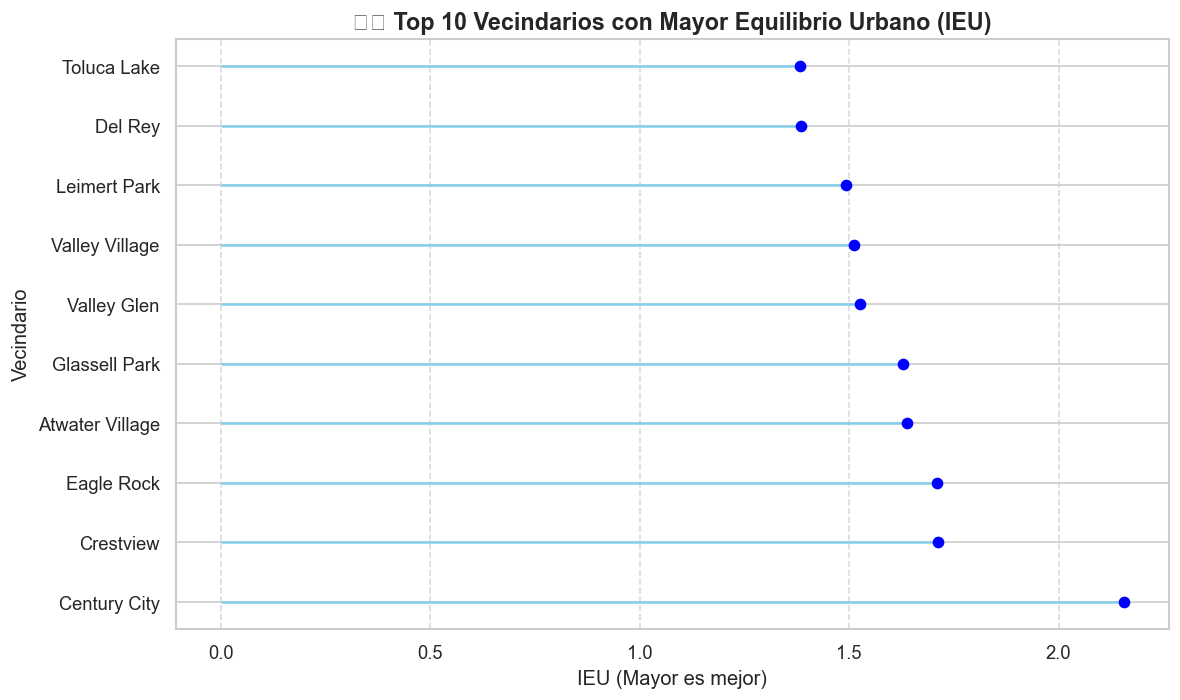

In [38]:
# Normalizar variables
crime_norm = df_final['Crime_Count'] / df_final['Crime_Count'].mean()
business_norm = df_final['Business_Count'] / df_final['Business_Count'].mean()
zhvi_norm = df_final['ZHVI'] / df_final['ZHVI'].dropna().mean()

# Calcular distancia euclidiana desde el punto ideal (0, 1, 1)
distancia = np.sqrt(
    (crime_norm - 0)**2 +
    (business_norm - 1)**2 +
    (zhvi_norm - 1)**2
)

# Invertimos la distancia para que un valor alto sea mejor equilibrio
df_final['IEU'] = 1 / distancia

top_ieu = df_final.sort_values(by='IEU', ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hlines(y=top_ieu['Neighborhood'], xmin=0, xmax=top_ieu['IEU'], color='skyblue')
plt.plot(top_ieu['IEU'], top_ieu['Neighborhood'], "o", color='blue')

plt.title("⚖️ Top 10 Vecindarios con Mayor Equilibrio Urbano (IEU)", fontsize=14, weight='bold')
plt.xlabel("IEU (Mayor es mejor)")
plt.ylabel("Vecindario")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

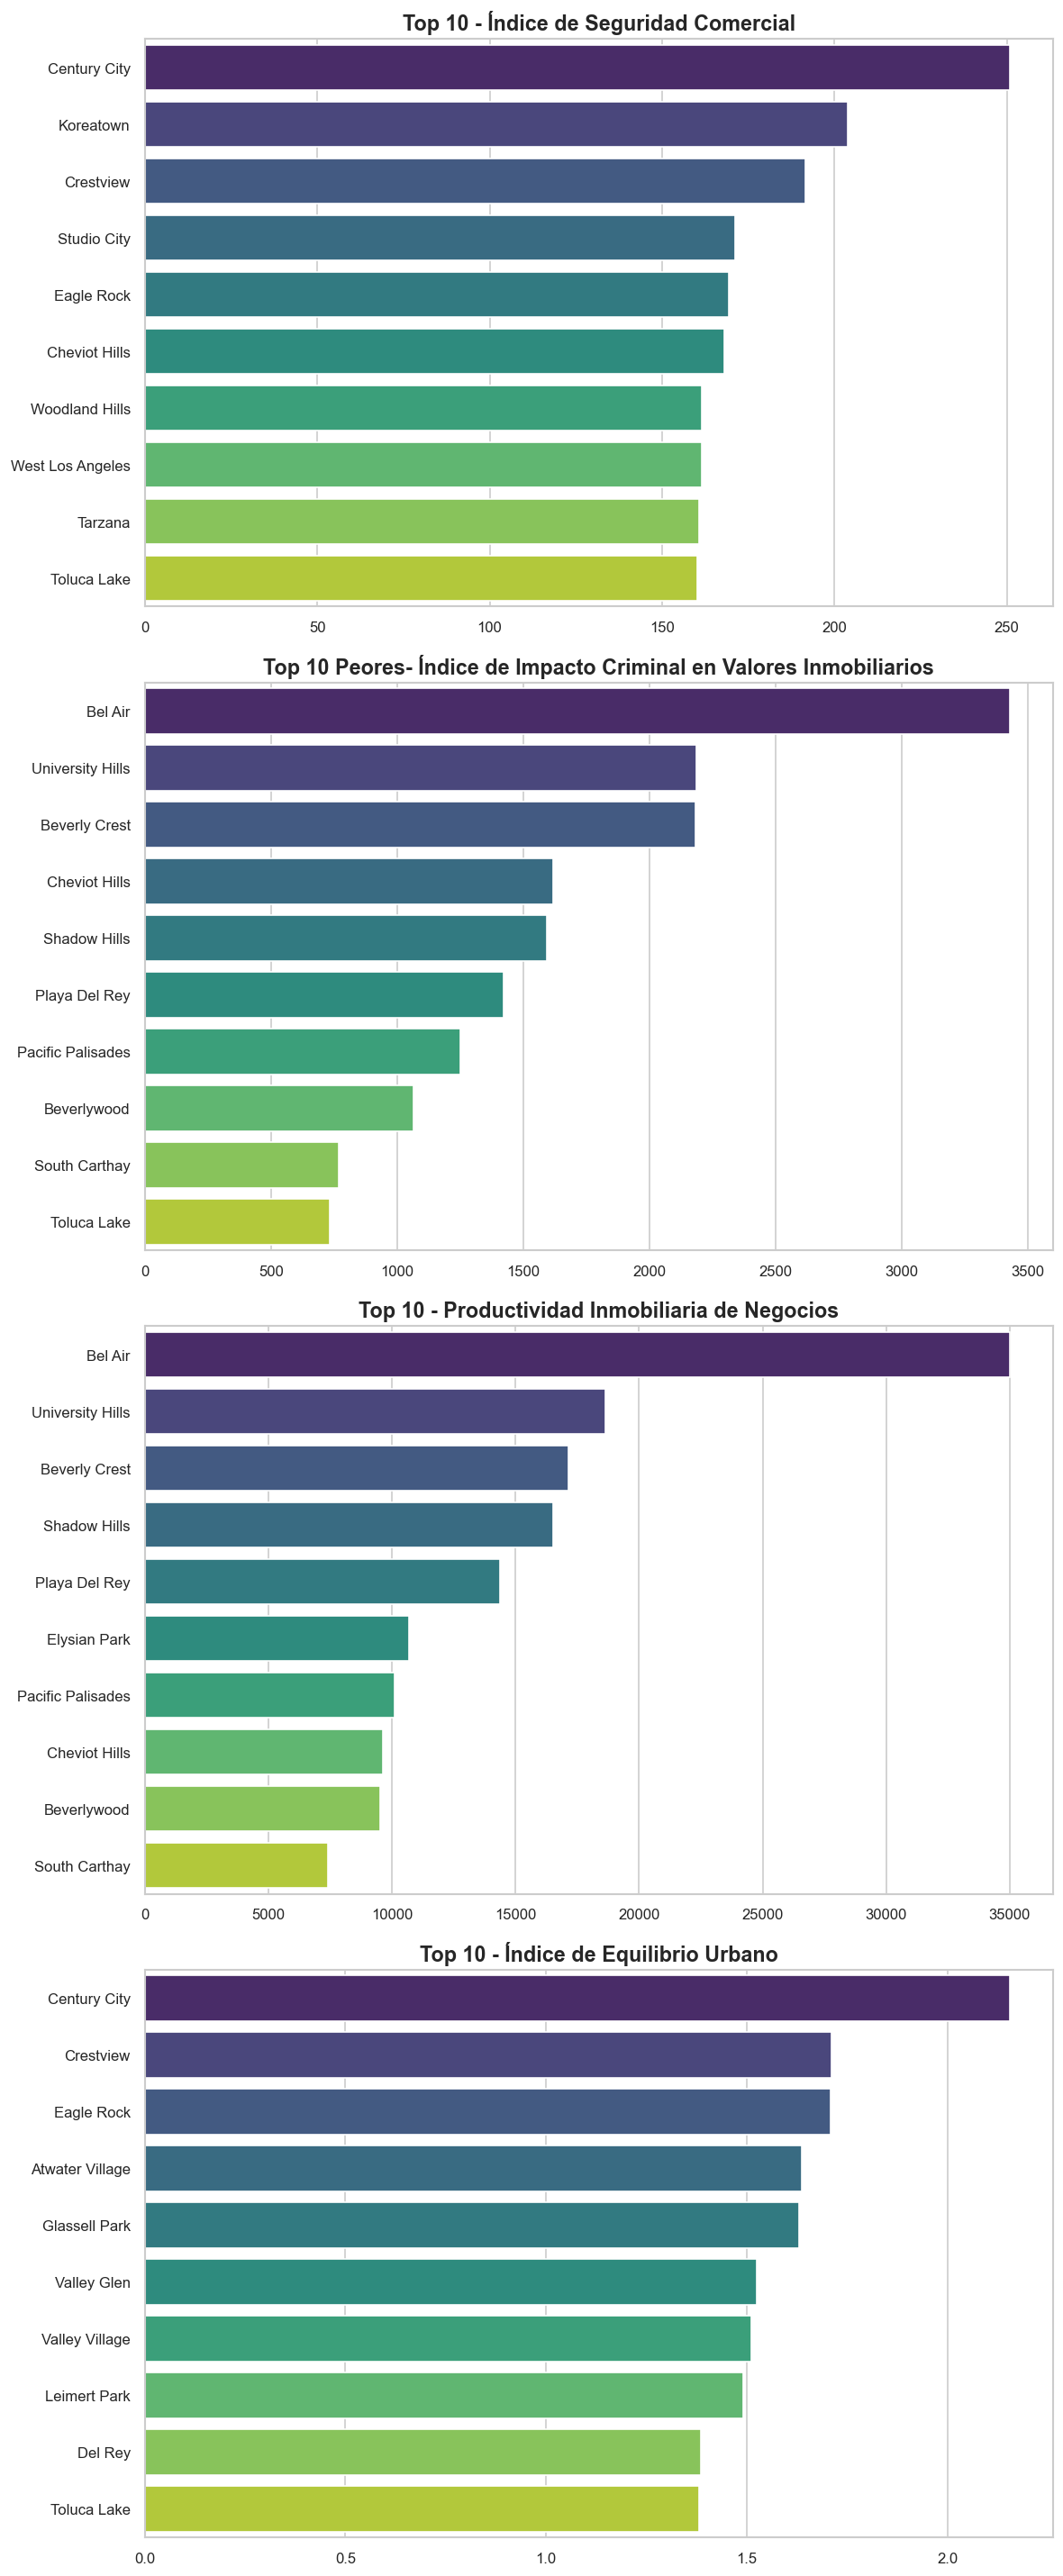

In [ ]:

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# Lista de KPIs con sus títulos
kpis = [
    ("ISC", "Top 10 - Índice de Seguridad Comercial"),
    ("ICVI", "Top 10 Peores- Índice de Impacto Criminal en Valores Inmobiliarios"),
    ("PIN", "Top 10 - Productividad Inmobiliaria de Negocios"),
    ("IEU", "Top 10 - Índice de Equilibrio Urbano")
]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 24))

# Generar gráficos para el top 10
for ax, (col, title) in zip(axs, kpis):
    # Ordenar y seleccionar el top 10
    top10_df = df_final.sort_values(by=col, ascending=False).head(10)
    
    sns.barplot(
        y="Neighborhood",
        x=col,
        data=top10_df,
        ax=ax,
        palette="viridis"
    )
    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

plt.show()

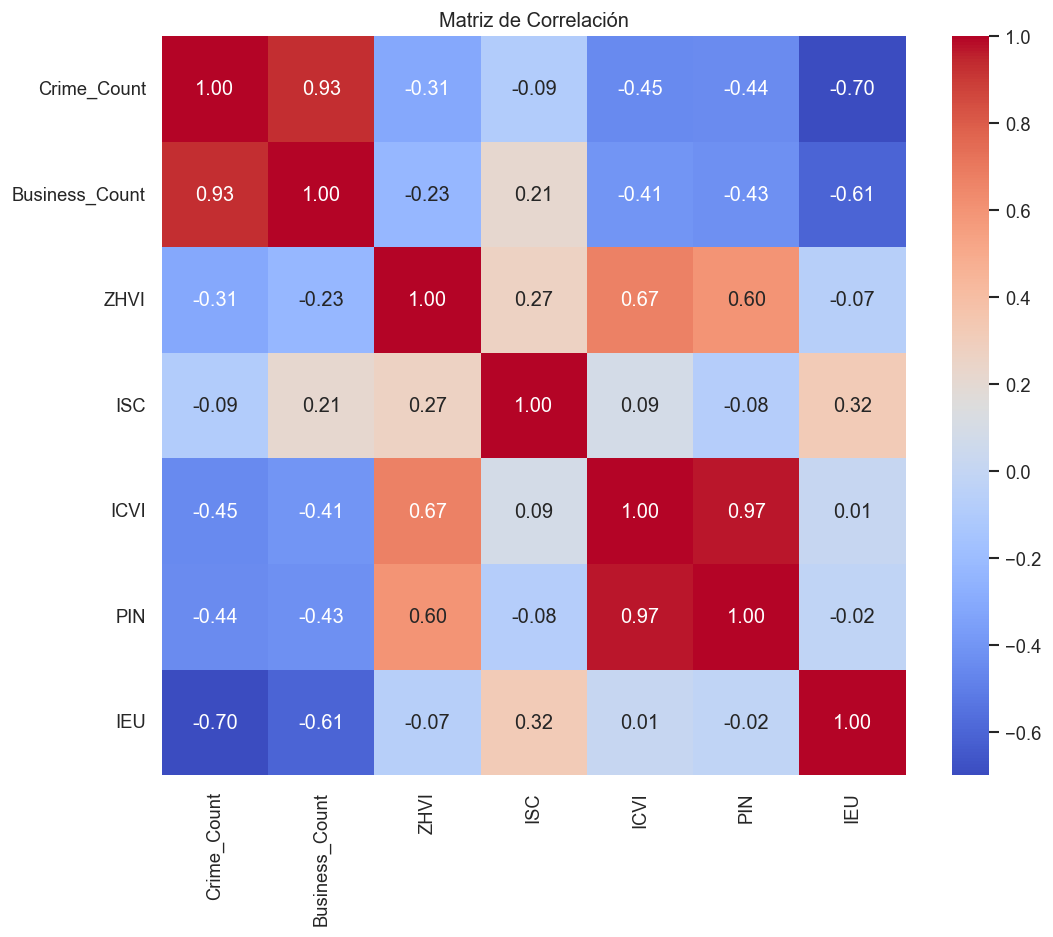

In [45]:
# Calcular matriz de correlación entre variables originales y nuevos KPIs
cols_for_corr = ['Crime_Count', 'Business_Count', 'ZHVI', 'ISC','ICVI','PIN','IEU']

correlation_matrix = df_final[cols_for_corr].corr(numeric_only=True) # Usar numeric_only=True aquí es opcional si todas las columnas son numéricas, pero buena práctica.

# Visualizar la matriz de correlación 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Correlación entre crimen y ZHVI: -0.3093


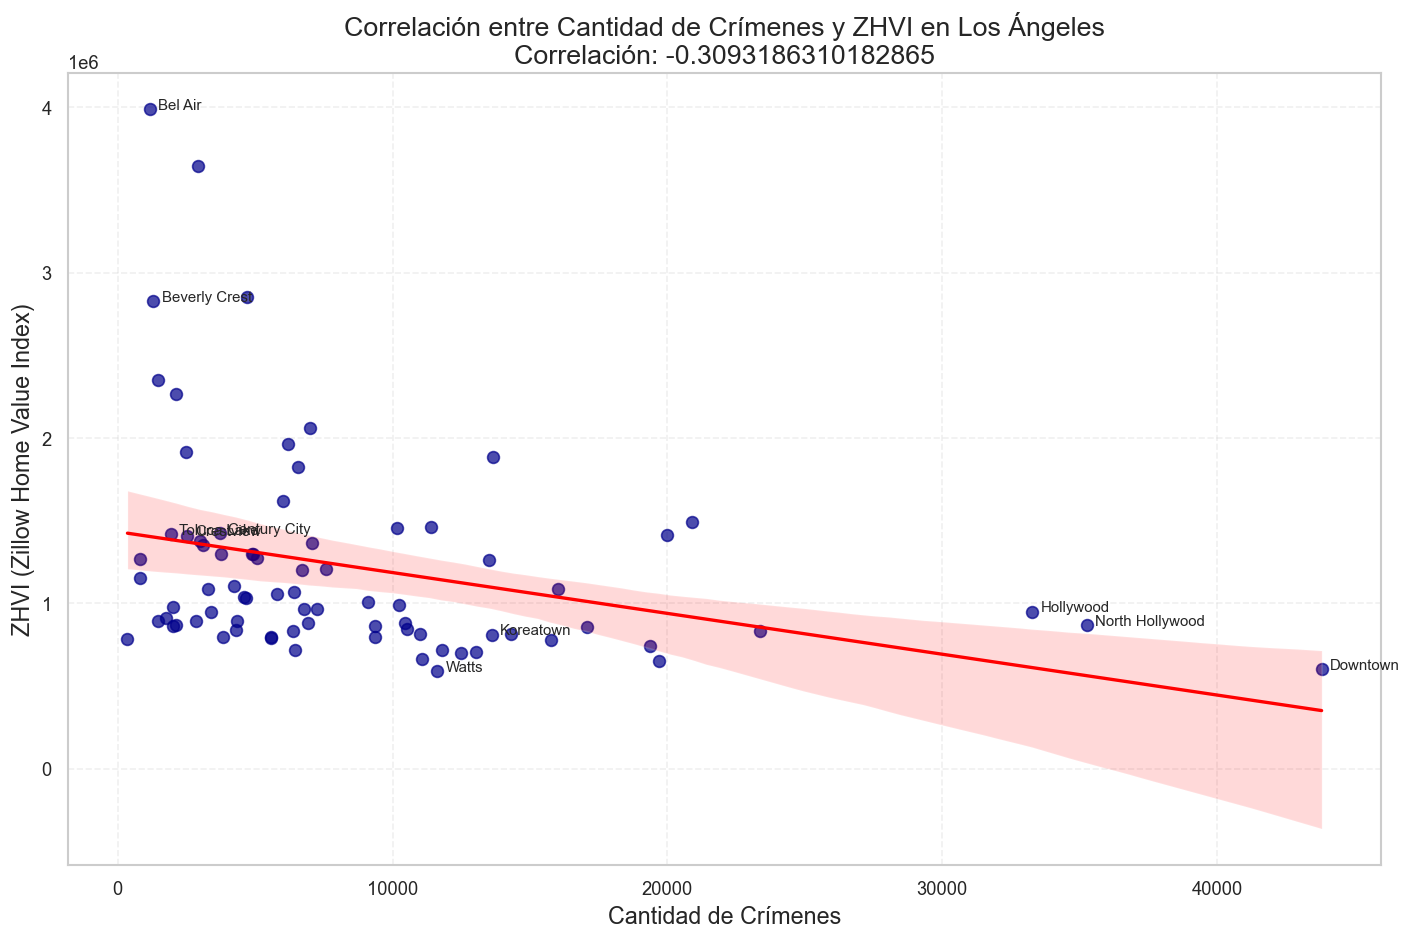

In [42]:

correlation = df_final['Crime_Count'].corr(df_final['ZHVI'])
print(f"Correlación entre crimen y ZHVI: {correlation:.4f}")


plt.figure(figsize=(12, 8))

# Crear el gráfico de dispersión con regresión usando seaborn
scatter = sns.regplot(x='Crime_Count', y='ZHVI', data=df_final, 
                    scatter_kws={'alpha':0.7, 's':50, 'color':'darkblue'}, 
                    line_kws={'color':'red', 'linewidth':2},
                    ci=95)  # Intervalo de confianza del 95% (área sombreada en rojo)


plt.title(f'Correlación entre Cantidad de Crímenes y ZHVI en Los Ángeles\nCorrelación: {correlation}', 
          fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Cantidad de Crímenes', fontsize=14)
plt.ylabel('ZHVI (Zillow Home Value Index)', fontsize=14)

# Añadir cuadrícula ligera
plt.grid(True, alpha=0.3, linestyle='--')

# Definir vecindarios específicos para etiquetar
neighborhoods_to_label = [
    'Bel Air', 'Watts', 'Crestview', 'Toluca Lake', 'Beverly Crest',
    'Koreatown', 'Century City', 'Hollywood', 'North Hollywood', 'Downtown'
]

# Etiquetar los vecindarios seleccionados
for neighborhood in neighborhoods_to_label:
    if neighborhood in df_final['Neighborhood'].values:
        row = df_final[df_final['Neighborhood'] == neighborhood].iloc[0]
        plt.annotate(neighborhood, 
                    xy=(row['Crime_Count'], row['ZHVI']),
                    xytext=(5, 0), textcoords='offset points',
                    fontsize=9)


plt.tight_layout()
plt.show()

Correlación entre Negocios y Crímenes: 0.9285


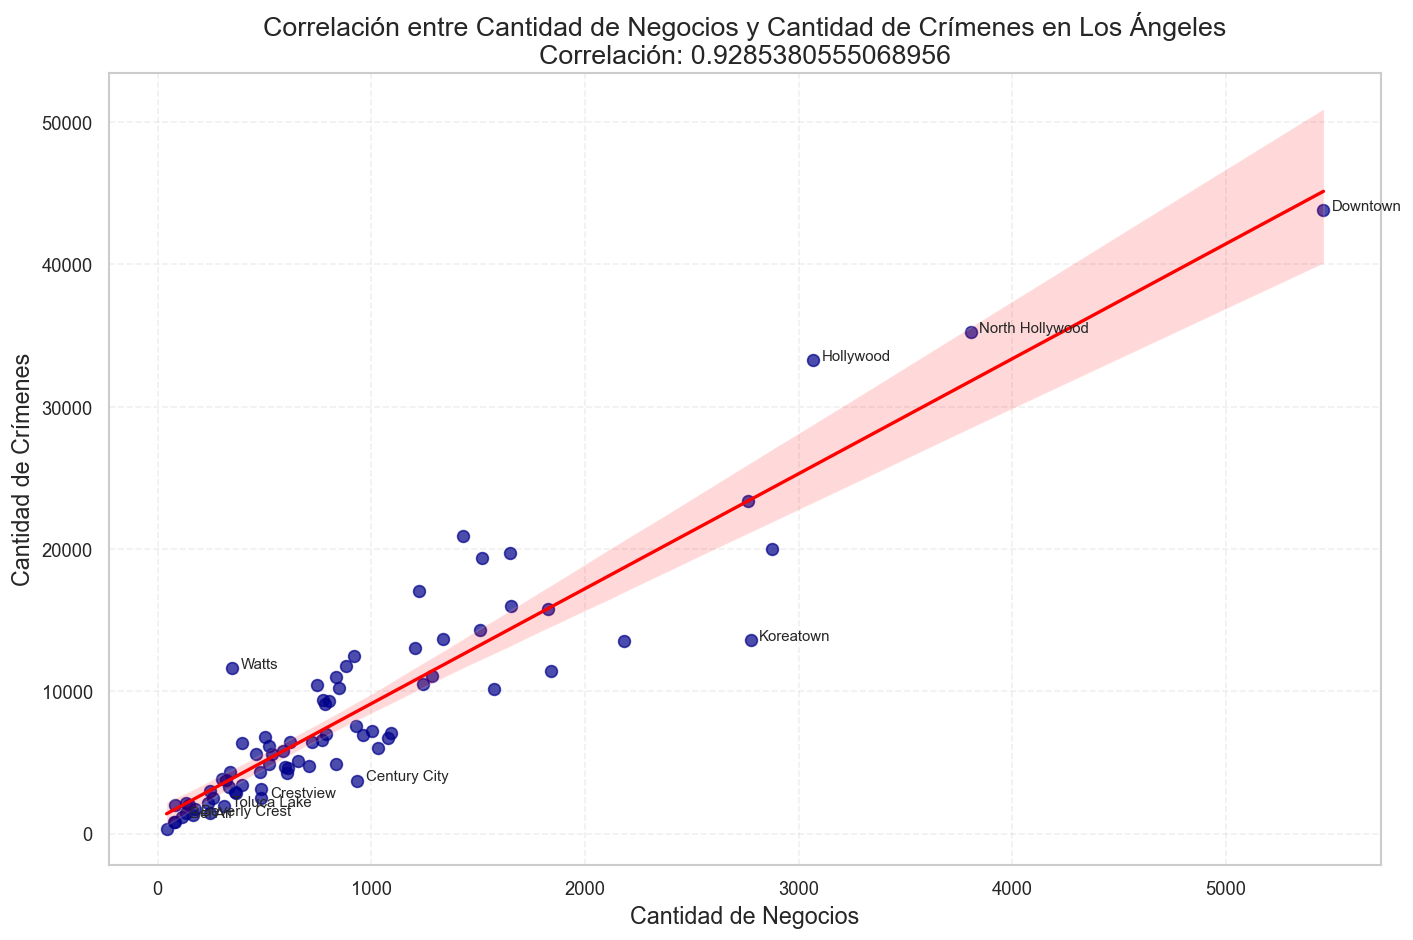

In [43]:
correlation = df_final['Business_Count'].corr(df_final['Crime_Count'])
print(f"Correlación entre Negocios y Crímenes: {correlation:.4f}")

# Crear la figura y establecer el tamaño
plt.figure(figsize=(12, 8))

# Crear el gráfico de dispersión con regresión usando seaborn
scatter = sns.regplot(x='Business_Count', y='Crime_Count', data=df_final, 
                    scatter_kws={'alpha':0.7, 's':50, 'color':'darkblue'}, 
                    line_kws={'color':'red', 'linewidth':2},
                    ci=95)  # Intervalo de confianza del 95% (área sombreada en rojo)

# Añadir el título con la correlación calculada
plt.title(f'Correlación entre Cantidad de Negocios y Cantidad de Crímenes en Los Ángeles\nCorrelación: {correlation}', 
          fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Cantidad de Negocios', fontsize=14)
plt.ylabel('Cantidad de Crímenes', fontsize=14)

# Añadir cuadrícula ligera
plt.grid(True, alpha=0.3, linestyle='--')

# Definir vecindarios específicos para etiquetar
neighborhoods_to_label = [
    'Bel Air', 'Watts', 'Crestview', 'Toluca Lake', 'Beverly Crest',
    'Koreatown', 'Century City', 'Hollywood', 'North Hollywood', 'Downtown'
]

# Etiquetar los vecindarios seleccionados
for neighborhood in neighborhoods_to_label:
    if neighborhood in df_final['Neighborhood'].values:
        row = df_final[df_final['Neighborhood'] == neighborhood].iloc[0]
        plt.annotate(neighborhood, 
                    xy=(row['Business_Count'], row['Crime_Count']),
                    xytext=(5, 0), textcoords='offset points',
                    fontsize=9)

# Ajustar el diseño
plt.tight_layout()

# Guardar la gráfica (opcional)
# plt.savefig('correlacion_crimen_zhvi.png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

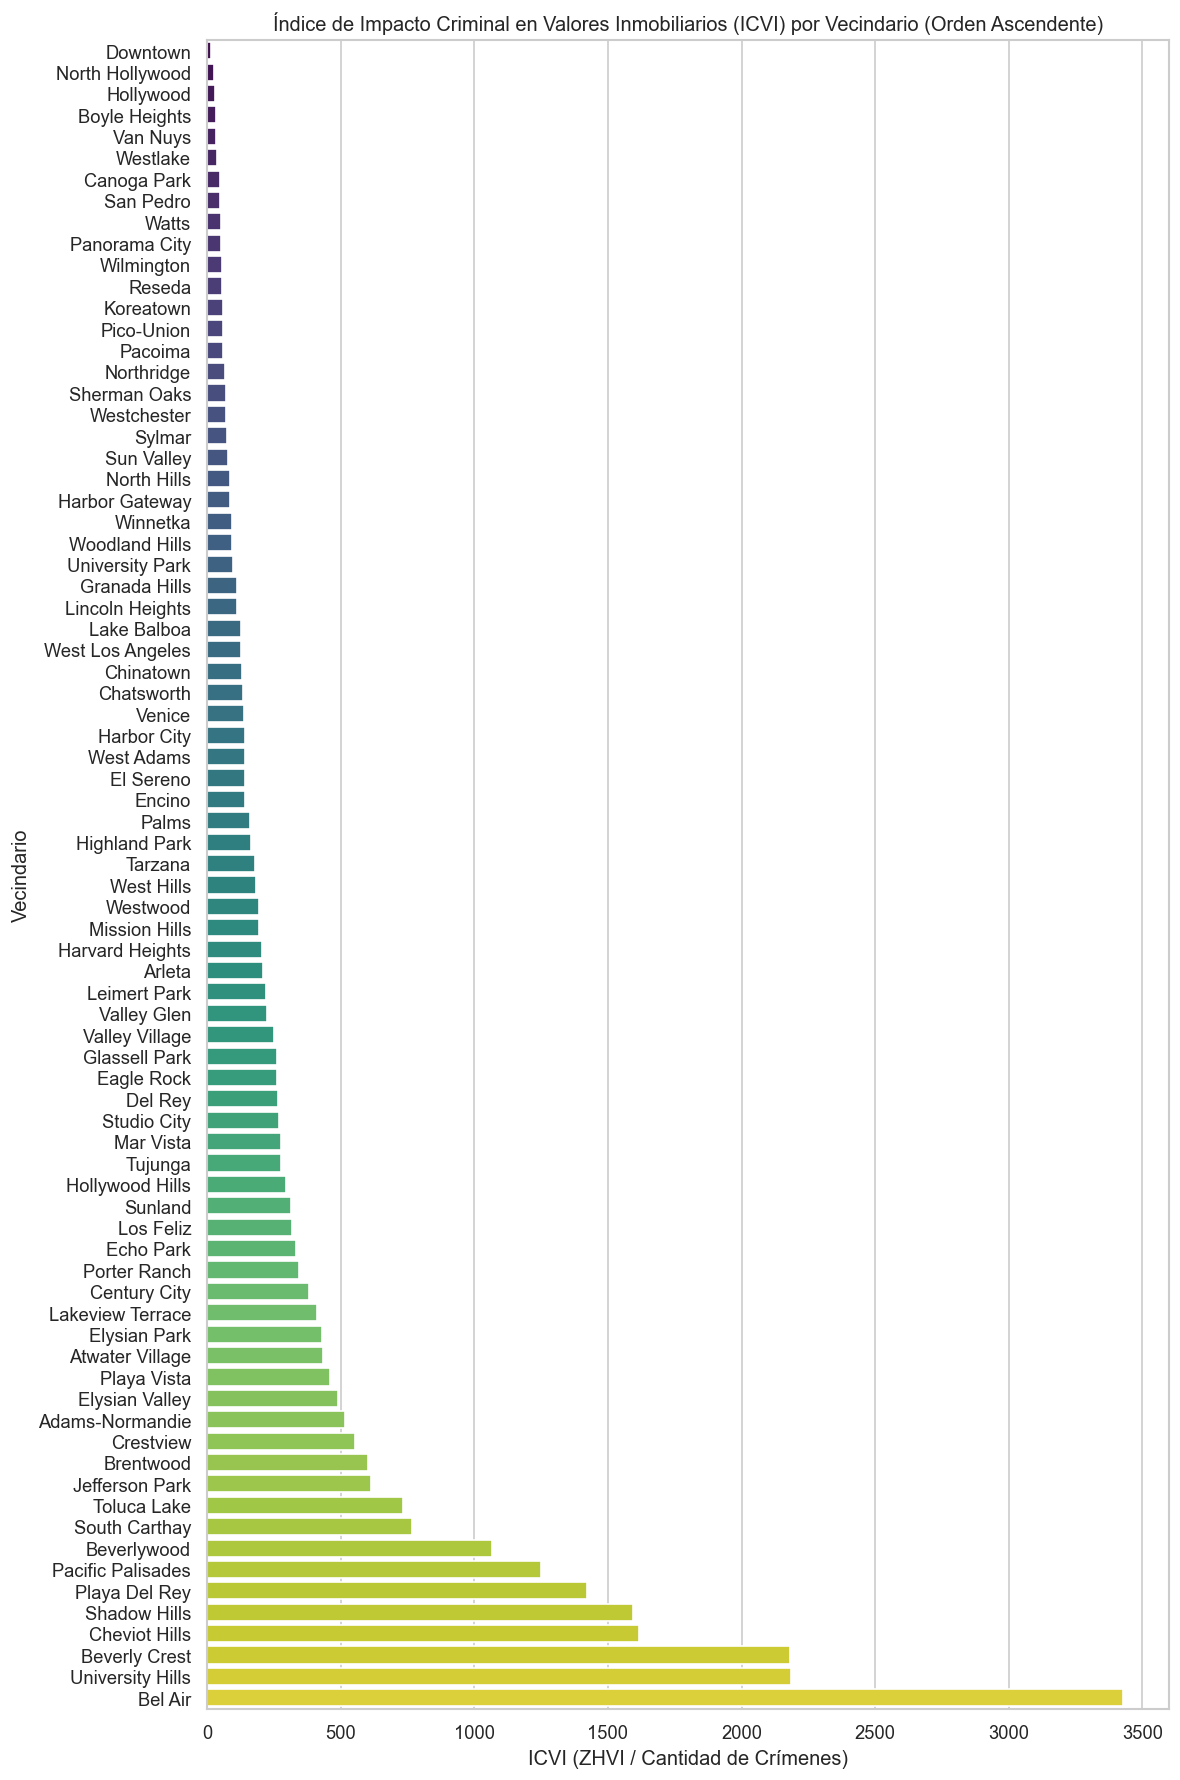

In [44]:
df_sorted_icvi = df_final.sort_values('ICVI', ascending=True).dropna(subset=['ICVI']) # Eliminar NaN por si acaso
plt.figure(figsize=(10, 15)) # Ajusta el tamaño según la cantidad de vecindarios

sns.barplot(x='ICVI', y='Neighborhood', data=df_sorted_icvi, orient='h', palette='viridis')

plt.title('Índice de Impacto Criminal en Valores Inmobiliarios (ICVI) por Vecindario (Orden Ascendente)')
plt.xlabel('ICVI (ZHVI / Cantidad de Crímenes)')
plt.ylabel('Vecindario')
plt.tight_layout() # Ajusta el layout para que no se corten las etiquetas
plt.show()

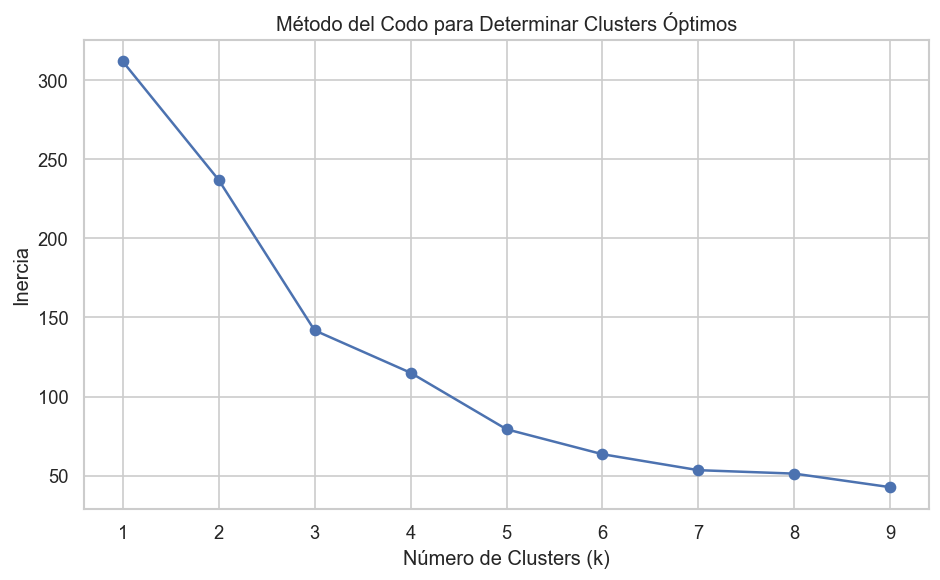

In [46]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos los KPIs
kpi_cols = ['IEU', 'ISC', 'ICVI', 'PIN']
X = df_final[kpi_cols].copy()

# Escalamos para que todos los KPIs tengan el mismo peso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Probar varios valores de K
inertia = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Graficar método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Método del Codo para Determinar Clusters Óptimos")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()

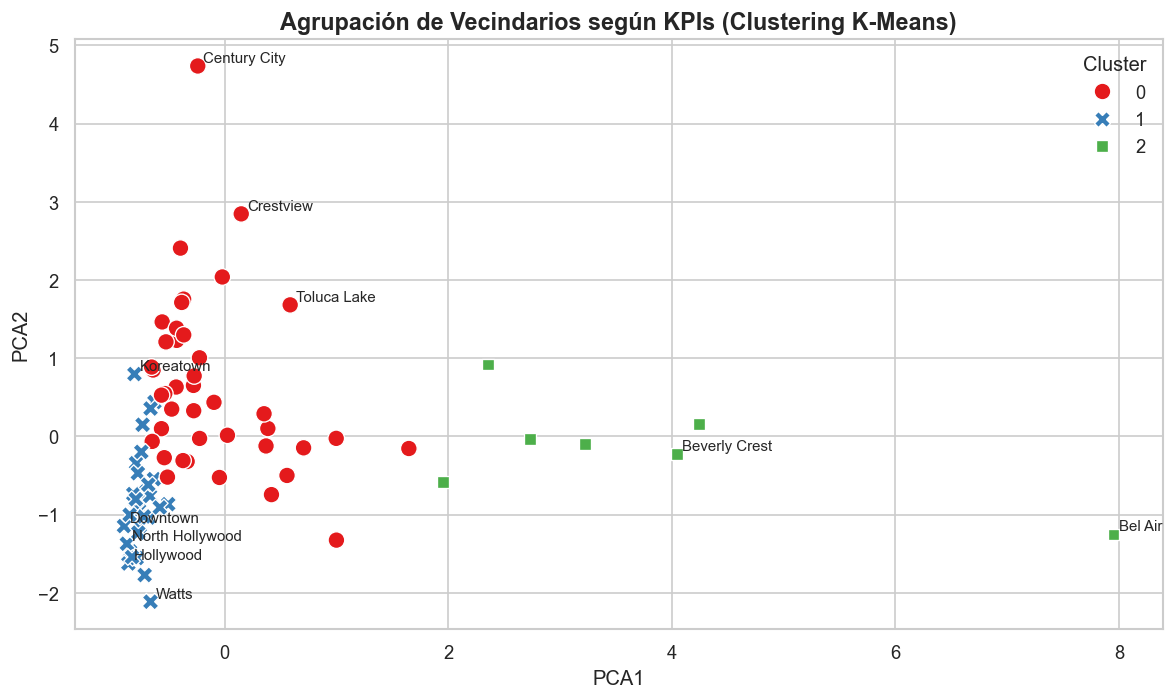

In [47]:
# Elegimos el k óptimo (ajusta según el resultado del codo)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_final['Cluster'] = kmeans.fit_predict(X_scaled)
from sklearn.decomposition import PCA
import seaborn as sns

# Reducimos a 2D para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_final['PCA1'] = X_pca[:, 0]
df_final['PCA2'] = X_pca[:, 1]

# Graficar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=df_final,
    palette='Set1',
    s=100,
    style='Cluster'
)

# Etiquetar solo los vecindarios seleccionados
for _, row in df_final.iterrows():
    if row['Neighborhood'] in neighborhoods_to_label:
        plt.text(row['PCA1'] + 0.05, row['PCA2'] + 0.05, row['Neighborhood'], fontsize=9)

plt.title("Agrupación de Vecindarios según KPIs (Clustering K-Means)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [48]:
clusters_asignados = df_final[['Neighborhood', 'Cluster']].sort_values(by='Cluster')
print(clusters_asignados)

          Neighborhood  Cluster
0      Adams-Normandie        0
59     Hollywood Hills        0
61      Jefferson Park        0
65         Lake Balboa        0
66    Lakeview Terrace        0
67        Leimert Park        0
68     Lincoln Heights        0
73           Los Feliz        0
77           Mar Vista        0
95               Palms        0
102        Playa Vista        0
56       Highland Park        0
103       Porter Ranch        0
121        Studio City        0
123            Sunland        0
126            Tarzana        0
129        Toluca Lake        0
132            Tujunga        0
135        Valley Glen        0
136     Valley Village        0
147         West Adams        0
148         West Hills        0
153           Westwood        0
116      South Carthay        0
53     Harvard Heights        0
85       Mission Hills        0
50         Harbor City        0
20        Century City        0
29           Crestview        0
12           Brentwood        0
31      

businees.isnull()